# Power Spectrum calculation with Pylians

## Voy a calcular los P(K) usando PyLians. El modelo del P(K) viene dado por la formula:

$P(K) = \sum_{i,j \in [1, \delta, \delta^2, s^2, \nabla^2\delta]} b_i·b_j·<|\delta_i(k)·\delta_j(k)| >$

https://ui.adsabs.harvard.edu/abs/2023MNRAS.524.2407Z/abstract

In [26]:
%pylab inline
import emcee
import programas as pg
import h5py
import MAS_library as MASL
import smoothing_library as SL
import Pk_library as PKL
import math

Populating the interactive namespace from numpy and matplotlib


In [27]:
2*np.pi/0.7

8.975979010256552

In [39]:
pathfields   = '/home/arodriguez/BACCO/bias-voids/IATE/fields_smooth/k0.75_4f/'
#fields = [#'F0z_0', 'F1z_0', 'F2z_0', 'F3z_0','F4z_0', 'simulationz_smooth_0']
R_sm = 12
F0 = np.load(pathfields+'F0_'+str(R_sm)+'.npy').astype(np.float32)
F1 = np.load(pathfields+'F1_'+str(R_sm)+'.npy').astype(np.float32)
F2 = np.load(pathfields+'F2_'+str(R_sm)+'.npy').astype(np.float32)
F3 = np.load(pathfields+'F3_'+str(R_sm)+'.npy').astype(np.float32)
F4 = np.load(pathfields+'F4_'+str(R_sm)+'.npy').astype(np.float32)

sim = np.load(pathfields+'simulation_smooth_'+str(R_sm)+'.npy').astype(np.float32)

In [40]:
BoxSize = 1440
MAS = 'CIC'
threads = 10
verbose = True

In [41]:
# compute power spectrum

Pk = PKL.Pk(sim, BoxSize, 0, MAS, threads, verbose)


Computing power spectrum of the field...
Time to complete loop = 7.10
Time taken = 9.64 seconds


In [42]:
# 3D P(k)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole
Pk4     = Pk.Pk[:,2] #hexadecapole
Pkphase = Pk.Pkphase #power spectrum of the phases
Nmodes  = Pk.Nmodes3D

Text(0.5, 0, '$k[h\\,Mpc]$')

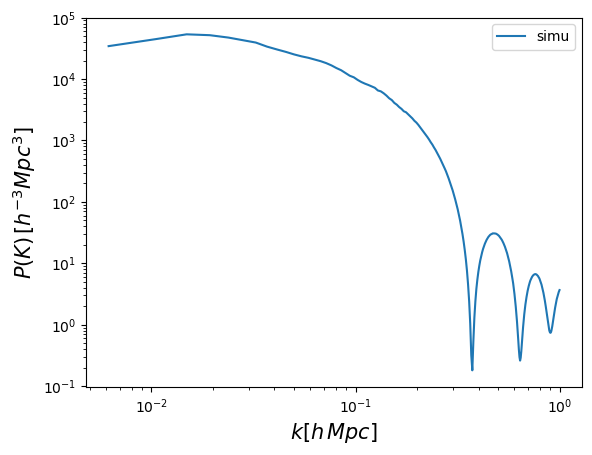

In [43]:
limite, = np.where(k<1)
plt.plot(k[limite],Pk0[limite],label='simu')
plt.semilogy()
plt.semilogx()
plt.legend()
plt.ylabel('$P(K)\,[h^{-3}Mpc^3]$',size=15)
plt.xlabel('$k[h\,Mpc]$',size=15)

# Ahora calculo los auto-P(K) de los fields del modelo

In [44]:
Pk_0 = PKL.Pk(F0, BoxSize, 0, MAS, threads, verbose)
print('done F0')
Pk_1 = PKL.Pk(F1, BoxSize, 0, MAS, threads, verbose)
print('done F1')
Pk_2 = PKL.Pk(F2, BoxSize, 0, MAS, threads, verbose)
print('done F2')
Pk_3 = PKL.Pk(F3, BoxSize, 0, MAS, threads, verbose)
print('done F3')
Pk_4 = PKL.Pk(F4, BoxSize, 0, MAS, threads, verbose)
print('done F4')


Computing power spectrum of the field...
Time to complete loop = 7.12
Time taken = 9.60 seconds
done F0

Computing power spectrum of the field...
Time to complete loop = 7.12
Time taken = 9.71 seconds
done F1

Computing power spectrum of the field...
Time to complete loop = 7.09
Time taken = 9.63 seconds
done F2

Computing power spectrum of the field...
Time to complete loop = 7.14
Time taken = 9.70 seconds
done F3

Computing power spectrum of the field...
Time to complete loop = 8.16
Time taken = 10.71 seconds
done F4


In [45]:
limite, = np.where(k<1)
plt.plot(Pk_0.k3D[limite],Pk_0.Pk[:,0][limite],label='F0')
plt.plot(Pk_1.k3D[limite],Pk_1.Pk[:,0][limite],label='F1')
plt.plot(Pk_2.k3D[limite],Pk_2.Pk[:,0][limite],label='F2')
plt.plot(Pk_3.k3D[limite],Pk_3.Pk[:,0][limite],label='F3')
plt.plot(Pk_4.k3D[limite],Pk_4.Pk[:,0][limite],label='F4')
plt.semilogy()
plt.semilogx()
plt.legend()
plt.ylabel('$P(K)\,[h^{-3}Mpc^3]$',size=15)
plt.xlabel('$k[h\,Mpc]$',size=15)

Text(0.5, 0, '$k[h\\,Mpc]$')

# Cross P(K)

## El modelo depende de cross power spectrum:

$P(K) = \sum_{i,j \in [1, \delta, \delta^2, s^2, \nabla^2\delta]} b_i·b_j·<|\delta_i(k)·\delta_j(k)| >$


In [46]:
P11 = PKL.XPk([F0,F0], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)


Computing power spectra of the fields...
Time FFTS = 6.09
Time loop = 3.78
Time taken = 9.87 seconds


In [47]:
P00 = PKL.XPk([F0,F0], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P01 = PKL.XPk([F0,F1], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P02 = PKL.XPk([F0,F2], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P03 = PKL.XPk([F0,F3], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P04 = PKL.XPk([F0,F4], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P11 = PKL.XPk([F1,F1], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P12 = PKL.XPk([F1,F2], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P13 = PKL.XPk([F1,F3], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P14 = PKL.XPk([F1,F4], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P22 = PKL.XPk([F2,F2], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P23 = PKL.XPk([F2,F3], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P24 = PKL.XPk([F2,F4], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P33 = PKL.XPk([F3,F3], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P34 = PKL.XPk([F3,F4], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)
P44 = PKL.XPk([F4,F4], BoxSize, axis=0, MAS=['CIC','CIC'], threads=1)



Computing power spectra of the fields...
Time FFTS = 5.07
Time loop = 5.05
Time taken = 10.12 seconds

Computing power spectra of the fields...
Time FFTS = 6.29
Time loop = 5.07
Time taken = 11.37 seconds

Computing power spectra of the fields...
Time FFTS = 6.38
Time loop = 5.00
Time taken = 11.39 seconds

Computing power spectra of the fields...
Time FFTS = 6.32
Time loop = 4.99
Time taken = 11.32 seconds

Computing power spectra of the fields...
Time FFTS = 6.35
Time loop = 5.41
Time taken = 11.77 seconds

Computing power spectra of the fields...
Time FFTS = 6.51
Time loop = 5.00
Time taken = 11.52 seconds

Computing power spectra of the fields...
Time FFTS = 6.39
Time loop = 5.01
Time taken = 11.40 seconds

Computing power spectra of the fields...
Time FFTS = 6.34
Time loop = 4.99
Time taken = 11.34 seconds

Computing power spectra of the fields...
Time FFTS = 6.31
Time loop = 4.99
Time taken = 11.30 seconds

Computing power spectra of the fields...
Time FFTS = 6.29
Time loop = 4.

In [48]:
pwd

'/home/arodriguez/BACCO/bias-voids/IATE'

In [49]:
path = '/home/arodriguez/BACCO/bias-voids/IATE/PowerSpectrum/'
k = P00.k3D
np.save(path+'k_'+str(R_sm)+'.npy', k)

np.save(path+'P00_'+str(R_sm)+'.npy', P00.XPk[:,0,0])
np.save(path+'P01_'+str(R_sm)+'.npy', P01.XPk[:,0,0])
np.save(path+'P02_'+str(R_sm)+'.npy', P02.XPk[:,0,0])
np.save(path+'P03_'+str(R_sm)+'.npy', P03.XPk[:,0,0])
np.save(path+'P04_'+str(R_sm)+'.npy', P04.XPk[:,0,0])

np.save(path+'P11_'+str(R_sm)+'.npy', P11.XPk[:,0,0])
np.save(path+'P12_'+str(R_sm)+'.npy', P12.XPk[:,0,0])
np.save(path+'P13_'+str(R_sm)+'.npy', P13.XPk[:,0,0])
np.save(path+'P14_'+str(R_sm)+'.npy', P14.XPk[:,0,0])

np.save(path+'P22_'+str(R_sm)+'.npy', P22.XPk[:,0,0])
np.save(path+'P23_'+str(R_sm)+'.npy', P23.XPk[:,0,0])
np.save(path+'P24_'+str(R_sm)+'.npy', P24.XPk[:,0,0])

np.save(path+'P33_'+str(R_sm)+'.npy', P33.XPk[:,0,0])
np.save(path+'P34_'+str(R_sm)+'.npy', P34.XPk[:,0,0])

np.save(path+'P44_'+str(R_sm)+'.npy', P44.XPk[:,0,0])

np.save(path+'Psimu_'+str(R_sm)+'.npy', Pk0)

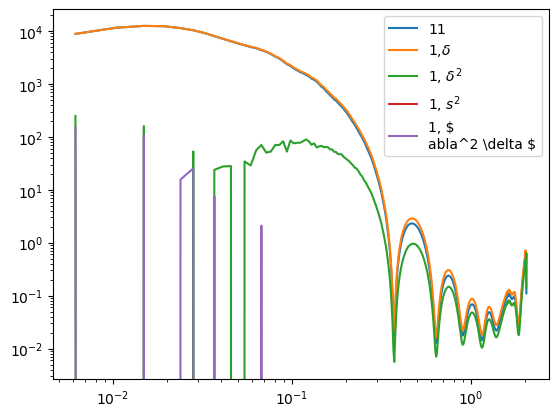

In [50]:
plt.plot(k, P00.XPk[:,0,0] ,label='11' )
plt.plot(k, P01.XPk[:,0,0] ,label='1,$\delta$')
plt.plot(k, P02.XPk[:,0,0] , label = '1, $\delta^2$')
plt.plot(k, P03.XPk[:,0,0] , label = '1, $s^2$')
plt.plot(k, P04.XPk[:,0,0] , label='1, $\nabla^2 \delta $')
plt.semilogy()
plt.semilogx()
plt.legend()

In [51]:
b0 = 1
b1 = 1.133331    
b2 = 0.54724399 
b3 = -0.37554869 
b4 = -1.18640415

nmean = 5e-4
#A = 

In [52]:
k = P00.k3D

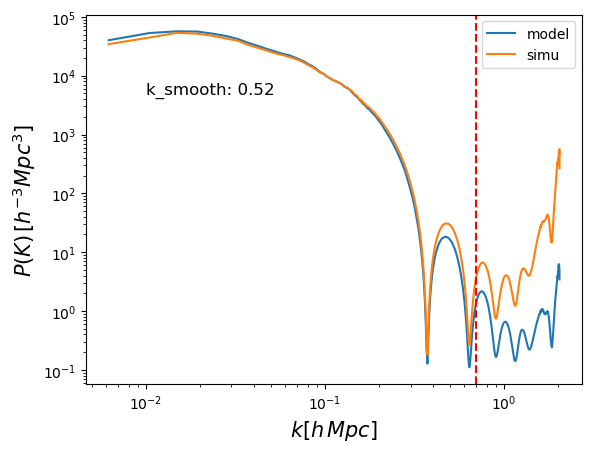

In [53]:
P_model2 = (b0*b0*P00.XPk[:,0,0] + b0*b1*P01.XPk[:,0,0] + b0*b2*P02.XPk[:,0,0] + b0*b3*P03.XPk[:,0,0] + b0*b4*P04.XPk[:,0,0] +
           b1*b0*P01.XPk[:,0,0] + b1*b1*P11.XPk[:,0,0] + b1*b2*P12.XPk[:,0,0] + b1*b3*P13.XPk[:,0,0] + b1*b4*P14.XPk[:,0,0] +
           b2*b0*P02.XPk[:,0,0] + b2*b1*P12.XPk[:,0,0] + b2*b2*P22.XPk[:,0,0] + b2*b3*P23.XPk[:,0,0] + b2*b4*P24.XPk[:,0,0] +
           b3*b0*P03.XPk[:,0,0] + b3*b1*P13.XPk[:,0,0] + b3*b2*P23.XPk[:,0,0] + b3*b3*P33.XPk[:,0,0] + b3*b4*P34.XPk[:,0,0] +
           b4*b0*P04.XPk[:,0,0] + b4*b1*P14.XPk[:,0,0] + b4*b2*P24.XPk[:,0,0] + b4*b3*P34.XPk[:,0,0] + b4*b4*P44.XPk[:,0,0])

if R_sm > 0:
    k_sm = 2 * math.pi / R_sm
    k_sm = round(k_sm, 2 - int(math.floor(math.log10(abs(k_sm)))) - 1)

plt.plot(k,P_model2 ,label='model')
plt.plot(k,Pk0,label='simu')
plt.semilogy()
plt.semilogx()
plt.legend()
plt.axvline(x=0.7, color='red', linestyle='--', label='x=0.7')  # Línea vertical en x=0.7

plt.ylabel('$P(K)\,[h^{-3}Mpc^3]$',size=15)
plt.xlabel('$k[h\,Mpc]$',size=15)
if R_sm > 0:
    plt.text(1e-2, 5e3, f"k_smooth: {k_sm:.2f}", fontsize=12)

[]

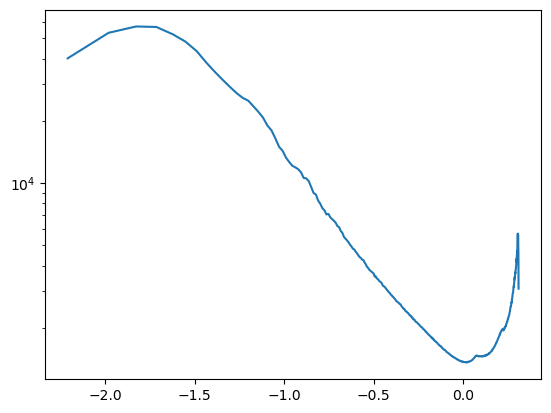

In [24]:
plt.plot(np.log10(k), P_model2)
plt.semilogy()

In [43]:
stop

NameError: name 'stop' is not defined

In [38]:
P_model = (b0*b0*P00.XPk[:,0,0] + b0*b1*P01.XPk[:,0,0] + b0*b2*P02.XPk[:,0,0] + b0*b3*P03.XPk[:,0,0] + b0*b4*P04.XPk[:,0,0] +
           b1*b1*P11.XPk[:,0,0] + b1*b2*P12.XPk[:,0,0] + b1*b3*P13.XPk[:,0,0] + b1*b4*P14.XPk[:,0,0] +
           b2*b2*P22.XPk[:,0,0] + b2*b3*P23.XPk[:,0,0] + b2*b4*P24.XPk[:,0,0] +
           b3*b3*P33.XPk[:,0,0] + b3*b4*P34.XPk[:,0,0] +
           b4*b4*P44.XPk[:,0,0])

In [39]:
plt.plot(k,P_model,label='model')
plt.plot(k,Pk0,label='simu')
plt.semilogy()
plt.semilogx()
plt.legend()
plt.axvline(x=0.7, color='red', linestyle='--', label='x=0.7')  # Línea vertical en x=0.7

plt.ylabel('$P(K)\,[h^{-3}Mpc^3]$',size=15)
plt.xlabel('$k[h\,Mpc]$',size=15)

Text(0.5, 0, '$k[h\\,Mpc]$')

In [40]:
P_model2 = (b0*b0*P00.XPk[:,0,0] + b0*b1*P01.XPk[:,0,0] + b0*b2*P02.XPk[:,0,0] + b0*b3*P03.XPk[:,0,0] + b0*b4*P04.XPk[:,0,0] +
           b1*b0*P01.XPk[:,0,0] + b1*b1*P11.XPk[:,0,0] + b1*b2*P12.XPk[:,0,0] + b1*b3*P13.XPk[:,0,0] + b1*b4*P14.XPk[:,0,0] +
           b2*b0*P02.XPk[:,0,0] + b2*b1*P12.XPk[:,0,0] + b2*b2*P22.XPk[:,0,0] + b2*b3*P23.XPk[:,0,0] + b2*b4*P24.XPk[:,0,0] +
           b3*b0*P03.XPk[:,0,0] + b3*b1*P13.XPk[:,0,0] + b3*b2*P23.XPk[:,0,0] + b3*b3*P33.XPk[:,0,0] + b3*b4*P34.XPk[:,0,0] +
           b4*b0*P04.XPk[:,0,0] + b4*b1*P14.XPk[:,0,0] + b4*b2*P24.XPk[:,0,0] + b4*b3*P34.XPk[:,0,0] + b4*b4*P44.XPk[:,0,0])

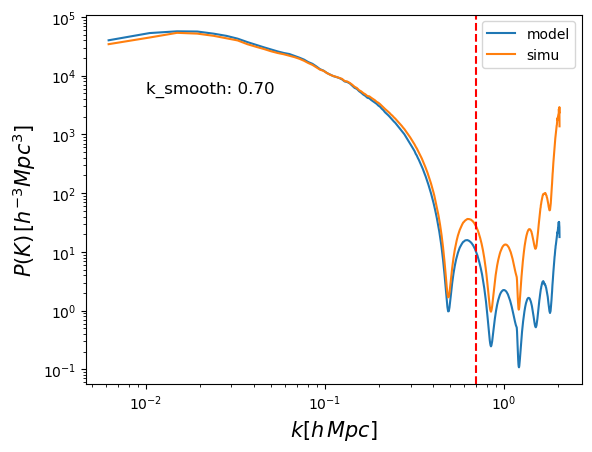

In [42]:
P_model2 = (b0*b0*P00.XPk[:,0,0] + b0*b1*P01.XPk[:,0,0] + b0*b2*P02.XPk[:,0,0] + b0*b3*P03.XPk[:,0,0] + b0*b4*P04.XPk[:,0,0] +
           b1*b0*P01.XPk[:,0,0] + b1*b1*P11.XPk[:,0,0] + b1*b2*P12.XPk[:,0,0] + b1*b3*P13.XPk[:,0,0] + b1*b4*P14.XPk[:,0,0] +
           b2*b0*P02.XPk[:,0,0] + b2*b1*P12.XPk[:,0,0] + b2*b2*P22.XPk[:,0,0] + b2*b3*P23.XPk[:,0,0] + b2*b4*P24.XPk[:,0,0] +
           b3*b0*P03.XPk[:,0,0] + b3*b1*P13.XPk[:,0,0] + b3*b2*P23.XPk[:,0,0] + b3*b3*P33.XPk[:,0,0] + b3*b4*P34.XPk[:,0,0] +
           b4*b0*P04.XPk[:,0,0] + b4*b1*P14.XPk[:,0,0] + b4*b2*P24.XPk[:,0,0] + b4*b3*P34.XPk[:,0,0] + b4*b4*P44.XPk[:,0,0])

if R_sm > 0:
    k_sm = 2 * math.pi / R_sm
    k_sm = round(k_sm, 2 - int(math.floor(math.log10(abs(k_sm)))) - 1)

plt.plot(k,P_model2 ,label='model')
plt.plot(k,Pk0,label='simu')
plt.semilogy()
plt.semilogx()
plt.legend()
plt.axvline(x=0.7, color='red', linestyle='--', label='x=0.7')  # Línea vertical en x=0.7

plt.ylabel('$P(K)\,[h^{-3}Mpc^3]$',size=15)
plt.xlabel('$k[h\,Mpc]$',size=15)
if R_sm > 0:
    plt.text(1e-2, 5e3, f"k_smooth: {k_sm:.2f}", fontsize=12)


(0.5, 2.0)

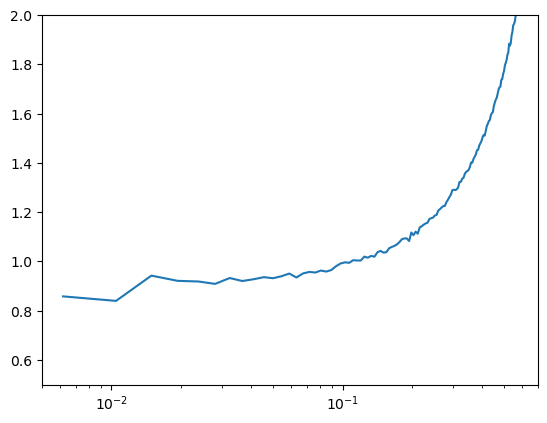

In [52]:
plt.plot(k, Pk0/P_model2)
plt.semilogx()
plt.xlim(0.005,0.7)
plt.ylim(0.5,2)